<a href="https://colab.research.google.com/github/ajits-github/Yelp_Dataset_Challenge_NLP/blob/main/Yelp_CodeLabs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import re
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
# import tensorflow as tf
from datetime import datetime
from sklearn import metrics
from sklearn.model_selection import train_test_split
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import textwrap
import matplotlib.pyplot as plt
from nltk import ngrams

from tqdm import tqdm
import copy
import nltk
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer

from sklearn.ensemble import RandomForestClassifier
import re
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import operator
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

In [7]:
# Path to original datasets
TRAIN_CSV = '/content/drive/MyDrive/Colab Notebooks/yelp_review_full_csv/train.csv'
TEST_CSV = '/content/drive/MyDrive/Colab Notebooks/yelp_review_full_csv/test.csv'

# Path to filtered datasets after Data Cleaning process (can be used if you already have them)
TRAIN_CSV_FILTERED = '/content/drive/MyDrive/Colab Notebooks/yelp_review_full_csv/clean_train_full.csv'
TEST_CSV_FILTERED = '/content/drive/MyDrive/Colab Notebooks/yelp_review_full_csv/clean_test_full.csv'

# Path for bigram calculations
BIGRAMS_TXT = '/content/drive/MyDrive/Colab Notebooks/yelp_review_full_csv/bigrams.txt'

For Yelp dataset, maximum number of Training records is 129500 for each label; Please set the number of records you want to use if not total as this is big number and training takes a lot of time. Similarly, there are 50k samples for test and you can set below for how many you want to make predicitions.

In [65]:
# no_of_records_to_use_for_TRAIN = 129500   # DEFAULT
no_of_records_to_use_for_TRAIN = 5000

# no_of_records_to_use_for_TEST = 50000   # DEFAULT
no_of_records_to_use_for_TEST = 200

## 1: Data Preprocessing


In [10]:
# read data from csv
cols = ['rating', 'original_data']
train_data = pd.read_csv(TRAIN_CSV, names=cols)
test_data = pd.read_csv(TEST_CSV, names=cols)

In [59]:
train_data

,rating,original_data
0,5,dr. goldberg offers everything i look for in a...
1,2,"Unfortunately, the frustration of being Dr. Go..."
2,4,Been going to Dr. Goldberg for over 10 years. ...
3,4,Got a letter in the mail last week that said D...
4,1,I don't know what Dr. Goldberg was like before...
...,...,...
649995,5,I had a sprinkler that was gushing... pipe bro...
649996,1,Phone calls always go to voicemail and message...
649997,1,Looks like all of the good reviews have gone t...
649998,5,I was able to once again rely on Yelp to provi...


In [60]:
# Details:

print("Shape of the dataset:")
print(train_data.shape)

# Column names
print("Column names:")
print(train_data.columns)

# Datatype of each column
print("Datatype of each column:")
print(train_data.dtypes)

# Few entries
print("Few entries:")
print(train_data.head())

# Dataset summary
train_data.describe(include='all')

Shape of the dataset:
(650000, 2)
Column names:
Index(['rating', 'original_data'], dtype='object')
Datatype of each column:
rating            int64
original_data    object
dtype: object
Few entries:
   rating                                      original_data
0       5  dr. goldberg offers everything i look for in a...
1       2  Unfortunately, the frustration of being Dr. Go...
2       4  Been going to Dr. Goldberg for over 10 years. ...
3       4  Got a letter in the mail last week that said D...
4       1  I don't know what Dr. Goldberg was like before...


,rating,original_data
count,650000.000000,650000
unique,NaN,650000
top,NaN,dr. goldberg offers everything i look for in a...
freq,NaN,1
mean,3.000000,NaN
std,1.414215,NaN
min,1.000000,NaN
25%,2.000000,NaN
50%,3.000000,NaN
75%,4.000000,NaN


In [61]:
test_data['clean_data'] = test_data['original_data']
train_data['clean_data'] = train_data['original_data']

In [62]:
train_data.head(2)
# test_data.head(2)

,rating,original_data,clean_data
0,5,dr. goldberg offers everything i look for in a...,dr. goldberg offers everything i look for in a...
1,2,"Unfortunately, the frustration of being Dr. Go...","Unfortunately, the frustration of being Dr. Go..."


In [64]:
train_data.describe(include='all')

,rating,original_data,clean_data
count,650000.000000,650000,650000
unique,NaN,650000,650000
top,NaN,dr. goldberg offers everything i look for in a...,dr. goldberg offers everything i look for in a...
freq,NaN,1,1
mean,3.000000,NaN,NaN
std,1.414215,NaN,NaN
min,1.000000,NaN,NaN
25%,2.000000,NaN,NaN
50%,3.000000,NaN,NaN
75%,4.000000,NaN,NaN


As we can see in above results of 'descibe' the unique values are comparatively lesser in clean_data column than original_data, so we must have some duplicates that needs to be dropped.

In [65]:
train_data.drop_duplicates(subset=['clean_data'], inplace=True)
train_data

,rating,original_data,clean_data
0,5,dr. goldberg offers everything i look for in a...,dr. goldberg offers everything i look for in a...
1,2,"Unfortunately, the frustration of being Dr. Go...","Unfortunately, the frustration of being Dr. Go..."
2,4,Been going to Dr. Goldberg for over 10 years. ...,Been going to Dr. Goldberg for over 10 years. ...
3,4,Got a letter in the mail last week that said D...,Got a letter in the mail last week that said D...
4,1,I don't know what Dr. Goldberg was like before...,I don't know what Dr. Goldberg was like before...
...,...,...,...
649995,5,I had a sprinkler that was gushing... pipe bro...,I had a sprinkler that was gushing... pipe bro...
649996,1,Phone calls always go to voicemail and message...,Phone calls always go to voicemail and message...
649997,1,Looks like all of the good reviews have gone t...,Looks like all of the good reviews have gone t...
649998,5,I was able to once again rely on Yelp to provi...,I was able to once again rely on Yelp to provi...


In [66]:
train_data.dropna(inplace=True)
train_data

,rating,original_data,clean_data
0,5,dr. goldberg offers everything i look for in a...,dr. goldberg offers everything i look for in a...
1,2,"Unfortunately, the frustration of being Dr. Go...","Unfortunately, the frustration of being Dr. Go..."
2,4,Been going to Dr. Goldberg for over 10 years. ...,Been going to Dr. Goldberg for over 10 years. ...
3,4,Got a letter in the mail last week that said D...,Got a letter in the mail last week that said D...
4,1,I don't know what Dr. Goldberg was like before...,I don't know what Dr. Goldberg was like before...
...,...,...,...
649995,5,I had a sprinkler that was gushing... pipe bro...,I had a sprinkler that was gushing... pipe bro...
649996,1,Phone calls always go to voicemail and message...,Phone calls always go to voicemail and message...
649997,1,Looks like all of the good reviews have gone t...,Looks like all of the good reviews have gone t...
649998,5,I was able to once again rely on Yelp to provi...,I was able to once again rely on Yelp to provi...


In [67]:
# Count all NaN in a DataFrame (both columns & Rows)
def check_nan(data):  
  return data.isnull().sum().sum()

In [68]:
check_nan(train_data)

0

In [70]:
# A small train dataset as it is too heavy and takes long and hence it depends on memory allocation
# trimmed_train_data = train_data[:10000]
trimmed_train_data = train_data

## 2: Data Cleaning



We can see there are a lot of punctuation marks like fullstop(.), comma(,), new line (\n) and so on and we need to remove it.

Many ways of doing it: Regex, Spacy, nltk, import punctuation from string.

Here is a list of all the punctuation marks that needs to be removed 
```
(!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~)
```


In [41]:
nltk.download("stopwords")
nltk.download("punkt")
nltk.download('wordnet')
stemmer = SnowballStemmer("english")
# stop_words = set(stopwords.words("english"))
stop_words = set(stopwords.words('english')) - set(['no', 'not']) # Since negative words going to play big role here

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [21]:
if 'not' in stop_words:
  print("yes")

Not removing punctuation as the words that are negations (like don't, won't etc.) plays a big role in deciding the ratings of the reviews. So below method is for expansion of those contractions.

In [184]:
## Function for replacing contractions with normal words
def contractions(sent):
    sent = re.sub(r"ain't", "am not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"aren't", "are not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"can't", "can not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"can't've", "can not have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"'cause", "because", sent, flags=re.IGNORECASE)
    sent = re.sub(r"could've", "could have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"couldn't", "could not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"couldn't've", "could not have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"doesn't", "does not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"hadn't", "had not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"hadn't've", "had not have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"hasn't", "has not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"haven't", "have not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"he'd", "he had", sent, flags=re.IGNORECASE)
    sent = re.sub(r"he'd've", "he would have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"he'll", "he will", sent, flags=re.IGNORECASE)
    sent = re.sub(r"he'll've", "he will have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"he's", "he has", sent, flags=re.IGNORECASE)
    sent = re.sub(r"how'd", "how did", sent, flags=re.IGNORECASE)
    sent = re.sub(r"how'd'y", "how do you", sent, flags=re.IGNORECASE)
    sent = re.sub(r"how'll", "how will", sent, flags=re.IGNORECASE)
    sent = re.sub(r"how's", "how has", sent, flags=re.IGNORECASE)
    sent = re.sub(r"i'd", "i had", sent, flags=re.IGNORECASE)
    sent = re.sub(r"i'd've", "i would have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"i'll", "i shall", sent, flags=re.IGNORECASE)
    sent = re.sub(r"i'll've", "i shall have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"i'm", "i am", sent, flags=re.IGNORECASE)
    sent = re.sub(r"i've", "i have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"isn't", "is not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"it'd", "it had", sent, flags=re.IGNORECASE)
    sent = re.sub(r"it'd've", "it would have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"it'll", "it shall", sent, flags=re.IGNORECASE)
    sent = re.sub(r"it'll've", "it shall have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"it's", "it has", sent, flags=re.IGNORECASE)
    sent = re.sub(r"let's", "let us", sent, flags=re.IGNORECASE)
    sent = re.sub(r"ma'am", "madam", sent, flags=re.IGNORECASE)
    sent = re.sub(r"mayn't", "may not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"might've", "might have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"mightn't", "might not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"mightn't've", "might not have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"must've", "must have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"mustn't", "must not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"mustn't've", "must not have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"needn't", "need not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"needn't've", "need not have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"o'clock", "of the clock", sent, flags=re.IGNORECASE)
    sent = re.sub(r"oughtn't", "ought not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"oughtn't've", "ought not have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"shan't", "shall not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"sha'n't", "shall not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"shan't've", "shall not have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"she'd", "she had", sent, flags=re.IGNORECASE)
    sent = re.sub(r"she'd've", "she would have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"she'll", "she shall", sent, flags=re.IGNORECASE)
    sent = re.sub(r"she'll've", "she shall have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"she's", "she has", sent, flags=re.IGNORECASE)
    sent = re.sub(r"should've", "should have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"shouldn't", "should not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"shouldn't've", "should not have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"so've", "so have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"so's", "so as", sent, flags=re.IGNORECASE)
    sent = re.sub(r"that'd", "that would", sent, flags=re.IGNORECASE)
    sent = re.sub(r"that'd've", "that would have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"that's", "that has", sent, flags=re.IGNORECASE)
    sent = re.sub(r"there'd", "there had", sent, flags=re.IGNORECASE)
    sent = re.sub(r"there'd've", "there would have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"there's", "there has", sent, flags=re.IGNORECASE)
    sent = re.sub(r"they'd", "they had", sent, flags=re.IGNORECASE)
    sent = re.sub(r"they'd've", "they would have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"they'll", "they shall", sent, flags=re.IGNORECASE)
    sent = re.sub(r"they'll've", "they shall have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"they're", "they are", sent, flags=re.IGNORECASE)
    sent = re.sub(r"they've", "they have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"to've", "to have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"wasn't", "was not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"we'd", "we had", sent, flags=re.IGNORECASE)
    sent = re.sub(r"we'd've", "we would have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"we'll", "we will", sent, flags=re.IGNORECASE)
    sent = re.sub(r"we'll've", "we will have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"we're", "we are", sent, flags=re.IGNORECASE)
    sent = re.sub(r"we've", "we have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"weren't", "were not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"what'll", "what shall", sent, flags=re.IGNORECASE)
    sent = re.sub(r"what'll've", "what shall have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"what're", "what are", sent, flags=re.IGNORECASE)
    sent = re.sub(r"what's", "what has", sent, flags=re.IGNORECASE)
    sent = re.sub(r"what've", "what have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"when's", "when has", sent, flags=re.IGNORECASE)
    sent = re.sub(r"when've", "when have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"where'd", "where did", sent, flags=re.IGNORECASE)
    sent = re.sub(r"where's", "where has", sent, flags=re.IGNORECASE)
    sent = re.sub(r"where've", "where have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"who'll", "who shall", sent, flags=re.IGNORECASE)
    sent = re.sub(r"who'll've", "who shall have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"who's", "who has", sent, flags=re.IGNORECASE)
    sent = re.sub(r"who've", "who have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"why's", "why has", sent, flags=re.IGNORECASE)
    sent = re.sub(r"why've", "why have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"will've", "will have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"won't", "will not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"won't've", "will not have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"would've", "would have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"wouldn't", "would not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"wouldn't've", "would not have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"y'all", "you all", sent, flags=re.IGNORECASE)
    sent = re.sub(r"y'all'd", "you all would", sent, flags=re.IGNORECASE)
    sent = re.sub(r"y'all'd've", "you all would have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"y'all're", "you all are", sent, flags=re.IGNORECASE)
    sent = re.sub(r"y'all've", "you all have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"you'd", "you had", sent, flags=re.IGNORECASE)
    sent = re.sub(r"you'd've", "you would have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"you'll", "you shall", sent, flags=re.IGNORECASE)
    sent = re.sub(r"you'll've", "you shall have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"how's", "how has", sent, flags=re.IGNORECASE)
    sent = re.sub(r"you're", "you are", sent, flags=re.IGNORECASE)
    sent = re.sub(r"you've", "you have", sent, flags=re.IGNORECASE)
    sent = re.sub(r"didn't", "did not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"don't", "do not", sent, flags=re.IGNORECASE)
    sent = re.sub(r"'","",sent, flags=re.IGNORECASE)
    sent = re.sub(r". . .","",sent, flags=re.IGNORECASE)
    return(sent)

Function for removing unwanted texts like digits, digit patterns etc.


In [185]:
def processing(data_1):
 
    for index, row in tqdm(data_1.iterrows()):
        stri = ""
        sent = ""

# Code to remove digit with word pattern
        cle = re.sub(r'([\d]+[a-zA-Z]+)|([a-zA-Z]+[\d]+)', "", row["clean_data"])

## Code to remove only digit patter
        cle = re.sub(r"(^|\s)(\-?\d+(?:\.\d)*|\d+|[\d]+[A-Za-z]+)"," ", cle)

## Code for concatinating strings
        stri = stri + cle

## Code for calling contraction function
        stri = contractions(stri)
        
        stri = clean(stri)
        lemmatizer = WordNetLemmatizer()
        
        for e in str(stri).split():
            e = lemmatizer.lemmatize(e, pos ="a")
            sent = ' '.join([sent,e])
        data_1["clean_data"][index] = sent

    return(data_1)

One thing to note here is that we are not converting the data to small case as there are few words (like NOT GOOD etc.) in the dataset that play big role in deciding the ratings. And, so we are handling that in below function while stemming.

Below is the function to handle whitespaces, tags, stemming etc.

In [186]:
def clean(text):
  """
      - remove any html tags (< /br> often found)
      - Keep only ASCII + European Chars and whitespace, no digits
      - remove single letter chars
      - convert all whitespaces (tabs etc.) to single wspace
      - remove stopwords, punctuation and stemm
  """
  RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
  RE_TAGS = re.compile(r"<[^>]+>")
  RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
  RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
  RE_SPECIALSYMBOLS = re.compile(r"[^A-Za-z\']+", re.IGNORECASE)

  text = re.sub(RE_TAGS, " ", text)
  text = re.sub(RE_ASCII, " ", text)
  text = re.sub(RE_SINGLECHAR, " ", text)
  text = re.sub(RE_WSPACE, " ", text)
  text = re.sub(RE_SPECIALSYMBOLS, " ", text)

  word_tokens = word_tokenize(text)
  words_filtered = [
        stemmer.stem(word) if not word.isupper() else word for word in word_tokens if word.lower() not in stop_words
    ]
  text_clean = " ".join(words_filtered)
  
  return text_clean

In [187]:
def remove_stopwords(text):
  word_tokens = word_tokenize(text)
  words_filtered = [word for word in word_tokens if word.lower() not in stop_words]
  text_clean = " ".join(words_filtered)
  return text_clean

In [189]:
## Calling the above function "processing" to clean the text 
clean_test_data = processing(test_data)
clean_train_data = processing(trimmed_train_data)

0it [00:00, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
10000it [00:44, 223.09it/s]


In [ ]:
# clean_test_data.head(5)
clean_train_data.head(5)

Removing the stopwords from the final dataframe as it has been observed that some time in some rows few stopwords are present. so make it completely clean, we call it once more after lemmatization.
Also, after so many processing there are chances of null values in the last column and hence we must drop those rows.

In [ ]:
# Before dropping NaN
print(clean_train_data.shape)
print(clean_test_data.shape)

# Dropping nans
clean_train_data.dropna(inplace=True)
clean_test_data.dropna(inplace=True)

# After dropping NaN
print(clean_train_data.shape)
print(clean_test_data.shape)

# Dropping original data column and renaming the other column for both train/test for easiness while saving to csv later
clean_train_data.drop(columns=['original_data'], inplace = True)
clean_train_data.rename(columns = {'clean_data':'reviews'}, inplace = True)

clean_test_data.drop(columns=['original_data'], inplace = True)
clean_test_data.rename(columns = {'clean_data':'reviews'}, inplace = True)

In [205]:
clean_train_data

,rating,original_data,clean_data
0,5,dr. goldberg offers everything i look for in a...,dr goldberg offer everythinook iener practitio...
1,2,"Unfortunately, the frustration of being Dr. Go...",unfortun frustrat dr goldberg patient iepeat e...
2,4,Been going to Dr. Goldberg for over 10 years. ...,go dr goldberg yearshina one patient start MHM...
3,4,Got a letter in the mail last week that said D...,goetter mail last week said dr goldberg move a...
4,1,I don't know what Dr. Goldberg was like before...,not know dr goldberg like move arizona let tel...
...,...,...,...
9995,5,Just seemed to be renovated because I stayed t...,seem renov becaustay likiffer place halat scre...
9996,4,"Extremely well run ! Great breakfast , clean r...",extrem well rureat breakfaslean room anespect ...
9997,2,A modern shopping experience (back in the 80s)...,modern shop experi back ni paiisit deforest pi...
9998,2,Not impressed. The prices here seem to keep go...,not impress price seem keep go noth chang stor...


In [35]:
clean_train_data.to_csv(TRAIN_CSV_FILTERED, index=False) 

In [ ]:
clean_test_data.to_csv(TEST_CSV_FILTERED, index=False)

## 3: Data Visualization

---



In [74]:
train_data_cleaned = pd.read_csv(TRAIN_CSV_FILTERED)
train_data_cleaned.dropna(inplace=True)
train_data_cleaned

,rating,reviews
0,5,dr goldberg offer everythinook iener practitio...
1,2,unfortun frustrat dr goldberg patient iepeat e...
2,4,go dr goldberg yearshina one patient start MHM...
3,4,goetter mail last week said dr goldberg move a...
4,1,not know dr goldberg like move arizona let tel...
...,...,...
648219,5,haprinkl gush pipe broken way ground turn ead ...
648220,1,phone call alway go voicemail messag not retur...
648221,1,look like good review gone head place jason ry...
648222,5,abl reli yelp provid need respons leak sprinkl...



*  Notice the number of records above ( < 650k) as there were nans which have been 

In [4]:
# A new column 'length' for the number of words in the clean_data
train_data_cleaned['length'] = train_data_cleaned['reviews'].astype(str).apply(len)
train_data_cleaned

,rating,reviews,length
0,5,dr goldberg offer everythinook iener practitio...,288
1,2,unfortun frustrat dr goldberg patient iepeat e...,357
2,4,go dr goldberg yearshina one patient start MHM...,244
3,4,goetter mail last week said dr goldberg move a...,146
4,1,not know dr goldberg like move arizona let tel...,622
...,...,...,...
648219,5,haprinkl gush pipe broken way ground turn ead ...,163
648220,1,phone call alway go voicemail messag not retur...,63
648221,1,look like good review gone head place jason ry...,259
648222,5,abl reli yelp provid need respons leak sprinkl...,251


A comparison to test how much the length of texts affects the ratings:

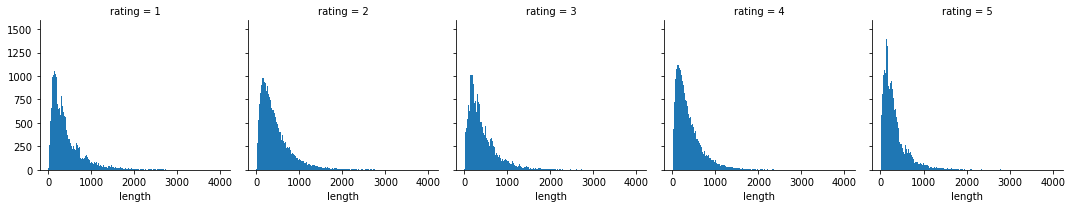

In [5]:
graph = sns.FacetGrid(data=train_data_cleaned,col='rating')
graph.map(plt.hist,'length',bins=1000)

 

* Basically, from the graph it can be seen that for all the ratings, the reviews containing 300-500 words has the largest contribution in the decision of star rating. That is, for each of the ratings, the number of reviews containing 300-500 words are the highest.

In [50]:
# Function for plotting the count plots
def plot_countplot(data):
    sns.catplot(x="rating", kind="count", palette="ch:.65", data= data).set(title='Bar Chart representing the distribution of Target Label')

# Function for plotting histograms
def plot_histogram(data,x,y,t):

    plt.style.use('ggplot')
    fig, ax = plt.subplots(figsize=(7,5))
    plt.hist(data, bins=50, color = "tab:blue")
    ax.set_title(t)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    
# Function to get unigram word frequencies of the text
def plot_wordfrequencies(text):
    word_dict = {}

    for i in text:
        for j in str(i).split():
            if j not in word_dict.keys():
                word_dict[j] = 1
            else:
                word_dict[j] += 1
    cd = sorted(word_dict.items(),key=operator.itemgetter(1),reverse=True)
    word_df = pd.DataFrame(cd[0:40],
                    columns=['Word', 'Frequency'])
    word_df = word_df.set_index('Word')
    return(word_df)

def write_reviews_to_text(data):
  text = data.tolist()
  with open(BIGRAMS_TXT, 'w') as f:
    for l in text:
      f.write(str(l))

sentences = []
df_frequency = []

# Function frequency: counts the frequency of the each "n-gram" output  # Parameter grammed: it takes the function "n_gram"s return as value. Briefly, the grammed text.
def frequency(grammed):
    sentences.clear()
    df_frequency.clear()
    freq = nltk.FreqDist(grammed)
    for k, v in freq.items():
        sentences.append(k)   
        df_frequency.append(v) 


# Function n_gram: splits the words in order to given parameter  # Parameter n: it's the "n" number for "n-gram"
def n_gram(n, data):
    write_reviews_to_text(data)
    text = open(BIGRAMS_TXT, 'r').read()
    n_grams = ngrams(text.split(), n)
    return n_grams


# Function to get Bigram word frequencies   
def create_plot_bigrams(num, data):
    frequency(n_gram(num,data))            
    gram_frame = pd.DataFrame(sentences)     
    gram_frame['frequencies'] = df_frequency
    gram_frame.columns = ['first', 'second', 'frequencies']
    gram_frame.sort_values("frequencies", axis=0, ascending=False, inplace=True, na_position='last')
    gram_frame = gram_frame.head(20)           
    total = sum(df_frequency)
    plt.rcdefaults()
    fig, ax = plt.subplots()
    grams = gram_frame["first"] + " " + gram_frame["second"]

    # Create plot
    y_pos = np.arange(len(grams))
    performance = gram_frame["frequencies"]
    ax.barh(y_pos, performance)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(grams)
    ax.invert_yaxis()  
    ax.set_xlabel('Frequency')
    ax.set_title('bigrams')

    plt.show()
    display(gram_frame)

    
#  function for plotting barcharts
def plot_barchart(data_df,x,y,z):
    jk = data_df.plot.bar(rot= 90,figsize=(20,5), color = "tab:blue", title = z, label = "Word Frequencies")
    jk.set_xlabel(x)
    jk.set_ylabel(y)
    


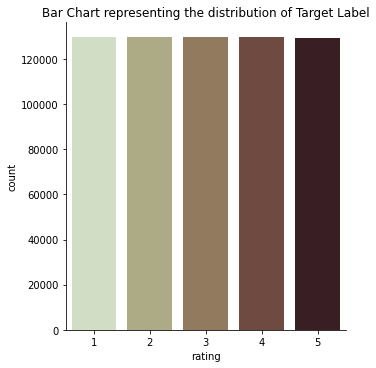

In [38]:
# Calling above function to plot the count plot of the reviews
plot_countplot(train_data_cleaned)



*   As we know this is almost(few records got removed having nans) an uniform dataset with all the classes containing equal records.


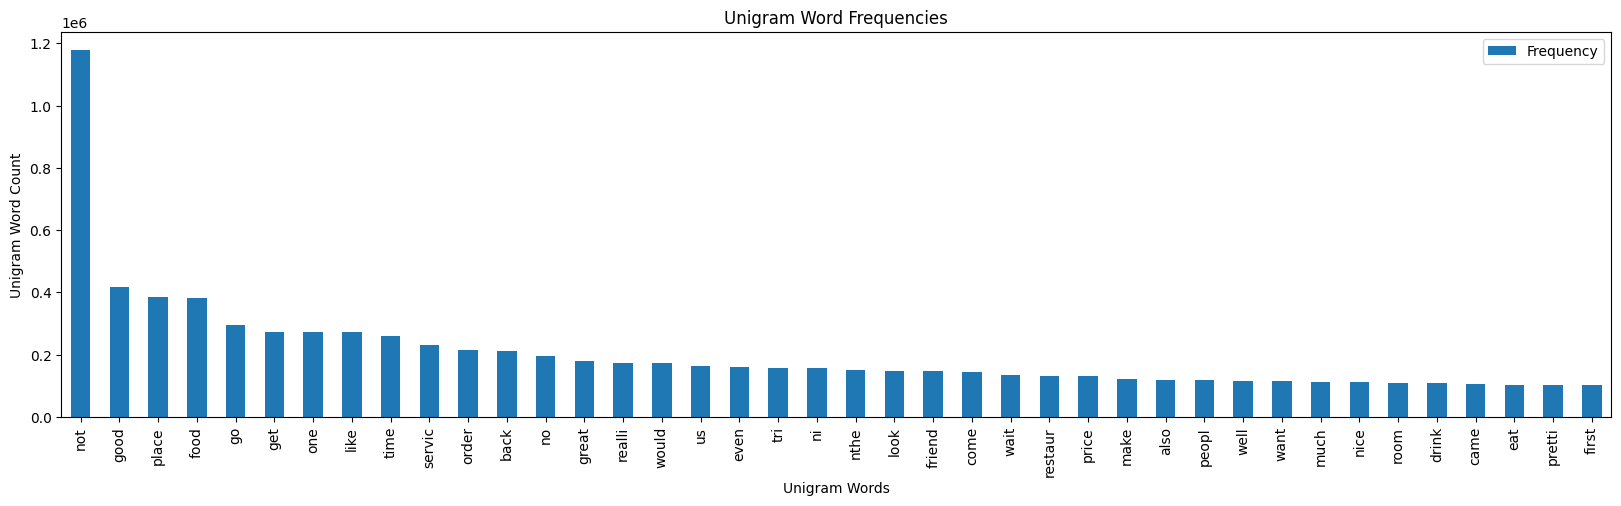

In [51]:
# Calling the above function to calculate the unigram word frequeicies of the reviews
word_df = plot_wordfrequencies(train_data_cleaned["reviews"])

# Calling the above function to plot the bar plot of top unigram words of reviews
plot_barchart(word_df,x = "Unigram Words", y = "Unigram Word Count", z = "Unigram Word Frequencies")



*   This was obvious as these words represent more of sentiments and hence more in numbers. Also the highest occurence comes for 'not' which is almost 120k times in the dataset.


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



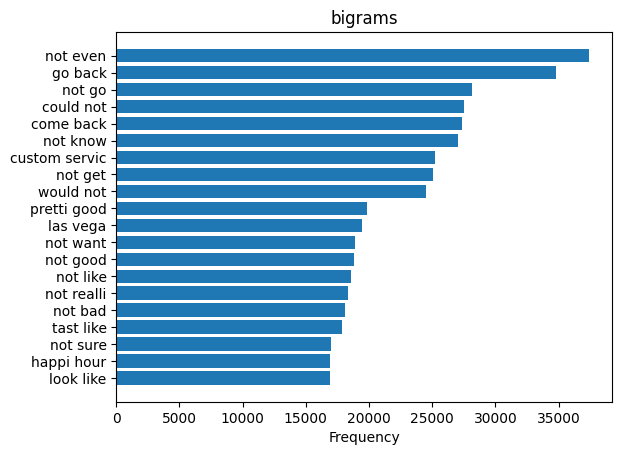

,first,second,frequencies
1582,not,even,37373
1587,go,back,34819
2261,not,go,28122
1541,could,not,27494
1815,come,back,27364
1675,not,know,27013
687,custom,servic,25246
77,not,get,25077
376,would,not,24476
4521,pretti,good,19849


In [39]:
# Callling function to plot bigrams
create_plot_bigrams(2,train_data_cleaned["reviews"] )



*   As expected with the sentiments, the most frequent bigrams involve more of 'good' and 'not' and emotion words like sure, pretty etc.


In [52]:
data_vi = train_data_cleaned

In [53]:
def plot_words_unigram(vis_index,freq,t,a,b):
    f, ax= plt.subplots(2,2,figsize=(15,5))
    ax = plt.subplot(111)
    index1, index2, index3, index4, index5 = vis_index
    freq1, freq2, freq3, freq4, freq5 = freq
    
    ## Plot multi-variate barcharts for the reviews 
    ax.bar(index1,freq1, width=0.5, color='tab:blue', align='center', label = "Rating 5")
    ax.bar(index2,freq2, width=0.5, color='tab:cyan', align='center', label = "Rating 4")
    ax.bar(index3,freq3, width=0.5, color='tab:red', align='center', label = "Rating 3")
    ax.bar(index4,freq4, width=0.5, color='tab:green', align='center', label = "Rating 2")
    ax.bar(index5,freq5, width=0.5, color='tab:purple', align='center', label = "Rating 1")
    plt.xticks(rotation=90)
    plt.xlabel(a)
    plt.ylabel(b)
    plt.title(t)
    plt.legend()

    plt.show()

In [54]:
## Separting the reviews and getting the unigram words and their frequencies
word_vis1 = plot_wordfrequencies(data_vi.loc[data_vi['rating'] == 5, "reviews"])
word_vis2 = plot_wordfrequencies(data_vi.loc[data_vi['rating'] == 4, "reviews"])
word_vis3 = plot_wordfrequencies(data_vi.loc[data_vi['rating'] == 3, "reviews"])
word_vis4 = plot_wordfrequencies(data_vi.loc[data_vi['rating'] == 2, "reviews"])
word_vis5 = plot_wordfrequencies(data_vi.loc[data_vi['rating'] == 1, "reviews"])

In [55]:
vis_index=(word_vis1.index,word_vis2.index,word_vis3.index,word_vis4.index,word_vis5.index)
freq=(word_vis1["Frequency"],word_vis2["Frequency"],word_vis3["Frequency"],word_vis4["Frequency"],word_vis5["Frequency"])

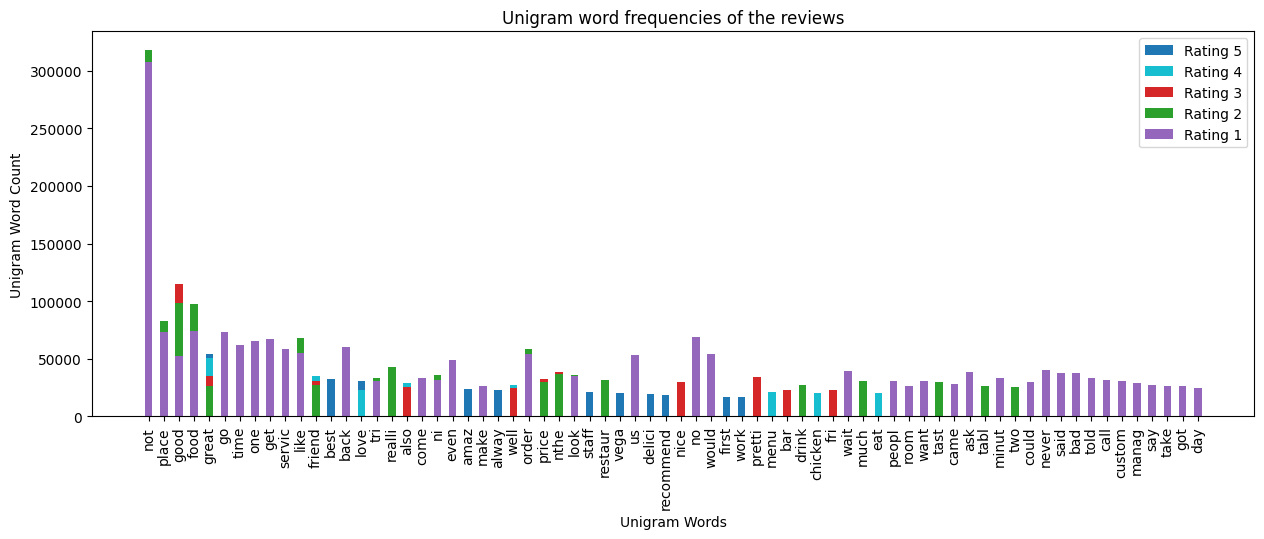

In [56]:
# For a better comparison of all the unigrams found earlier 
plot_words_unigram(vis_index,freq, t = "Unigram word frequencies of the reviews",a="Unigram Words",b="Unigram Word Count")



*   The above plot shows the bar chart for the frequent unigram words for all the ratings.
*   We can see that the top words used are "not", "food", "place", which is obvious as these indicate different kind of emotions while rating negative something.
*   Similarly, 'good' is seen equally in both reviews because it can be written as 'good'(rating=3) or 'not good'(rating=1).
*   This tells us we are proceeding in right direction and our data has been cleaned and filtered properly.

##4: Model Creation and Training

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses

import tensorflow_hub as hub
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import json

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

import os

In [19]:
train_data_cleaned = pd.read_csv(TRAIN_CSV_FILTERED)
test_data = pd.read_csv(TEST_CSV_FILTERED)
train_data_cleaned.dropna(inplace=True)
test_data

,rating,reviews
0,1,got new tire within two week golatook car toca...
1,1,not wast time two differ peopl come hous give ...
2,1,alan say bad peopl place lunch place freez loa...
3,1,restaur twice disappoint timesil not go back f...
4,1,food NOT GOOD husban ate heroupl week ago firs...
...,...,...
49995,1,want writeview chip saidould not recommend go ...
49996,5,great ambienc great drink great foodov place
49997,4,monk locat sas excit wheeard come sun prairi n...
49998,2,not go might want tri good review peopl sad no...


In [20]:
data=train_data_cleaned.copy()

In [21]:
# num_of_categories = 129500  # Set the number of records for each label that will be used for training
num_of_categories = no_of_records_to_use_for_TRAIN

shuffled = data.reindex(np.random.permutation(data.index))
e = shuffled[shuffled['rating'] == 1][:num_of_categories]
b = shuffled[shuffled['rating'] == 2][:num_of_categories]
t = shuffled[shuffled['rating'] == 3][:num_of_categories]
m = shuffled[shuffled['rating'] == 4][:num_of_categories]
q = shuffled[shuffled['rating'] == 5][:num_of_categories]
concated = pd.concat([e,b,t,m,q], ignore_index=True)

#Shuffle the dataset
concated = concated.reindex(np.random.permutation(concated.index))
concated['LABEL'] = 0

In [22]:
#One-hot encode the lab
concated.loc[concated['rating'] == 1, 'LABEL'] = 0
concated.loc[concated['rating'] == 2, 'LABEL'] = 1
concated.loc[concated['rating'] == 3, 'LABEL'] = 2
concated.loc[concated['rating'] == 4, 'LABEL'] = 3
concated.loc[concated['rating'] == 5, 'LABEL'] = 4

# print(concated['LABEL'][:10])

labels = to_categorical(concated['LABEL'], num_classes=5)
# print(labels[:10])

if 'rating' in concated.keys():
    concated.drop(['rating'], axis=1)

In [23]:
concated

,rating,reviews,LABEL
8796,2,husband ant recent trip vega stay hotel giveou...,1
20256,5,absolutelreat experi ndr lyon excel chiropract...,4
6635,2,place eh ounroupon call phone order wherrivene...,1
21868,5,new theater smell digit screen excel sound HDT...,4
10498,3,taplep manam night day legend consum greasi bu...,2
...,...,...,...
12336,3,stop dinner sunday night excit tri new deli ne...,2
7374,2,stay annual visit spring train found resort ki...,1
5562,2,want start oosit note server friend pretzel ta...,1
6422,2,one ouesday night although one person stop one...,1


In [24]:
from collections import Counter
Counter(" ".join(concated["reviews"]).split()).most_common(10000)[-1]

('boa', 9)

In [67]:
n_most_common_words = 10000  # Decided from above where we see the last of 5000 words which occur for 20 times in the dataset
max_len = 400  # This we had found in the visualization for each of the ratings that max len of reviews contributing the highest lies between 300-500
epochs = 5
emb_dim = 128
batch_size = 256

In [26]:
tokenizer = Tokenizer(num_words=n_most_common_words)
tokenizer.fit_on_texts(concated['reviews'].values)
sequences = tokenizer.texts_to_sequences(concated['reviews'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
X = pad_sequences(sequences, maxlen=max_len)

Found 107560 unique tokens.


In [27]:
X_train, X_val, y_train, y_val = train_test_split(X , labels, test_size=0.25, random_state=42)
validation_data = (X_val, y_val)

**1st Model - With LSTM**

In [28]:
# Build a LSTM model with output layer as the number of classes (5)

model_lstm = Sequential()
model_lstm.add(Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]))
model_lstm.add(SpatialDropout1D(0.7))
model_lstm.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model_lstm.add(Dense(5, activation='softmax'))

model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

print(model_lstm.summary())

history_lstm = model_lstm.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_data=validation_data,
                    callbacks=[EarlyStopping(monitor='val_loss',patience=6, min_delta=0.0001)]
                    )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 400, 128)          1280000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 400, 128)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 5)                 325       
                                                                 
Total params: 1,329,733
Trainable params: 1,329,733
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
74/74 [==============================] - 117s 2s/step - loss: 1.5797 - acc: 0.2476 - val_loss: 1.

In [51]:
# Separate Function for evaluating accuracy of the model validation data
def eval_accuracy(model):
  accr = model.evaluate(X_val, y_val)
  print('Val set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

In [304]:
eval_accuracy(model_lstm)

1954/1954 [==============================] - 114s 58ms/step - loss: 0.9891 - acc: 0.5723
Val set
  Loss: 0.989
  Accuracy: 0.572


**2nd Model - With Simple RNN**

In [48]:
model_rnn = tf.keras.Sequential()
model_rnn.add(layers.Embedding(n_most_common_words + 1, emb_dim))

# The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 256)
model_rnn.add(layers.GRU(256, return_sequences=True))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
model_rnn.add(layers.SimpleRNN(128))

model_rnn.add(layers.Dense(5))

# model.summary()
model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model_rnn.summary())

history_rnn = model_rnn.fit(X_train, y_train, 
                           epochs=epochs, 
                           batch_size=batch_size,
                           validation_data=validation_data,
                           callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)]
                           )

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 128)         1280128   
                                                                 
 gru_1 (GRU)                 (None, None, 256)         296448    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 128)               49280     
                                                                 
 dense_4 (Dense)             (None, 5)                 645       
                                                                 
Total params: 1,626,501
Trainable params: 1,626,501
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
74/74 [==============================] - 300s 4s/step - loss: 5.1245 - acc: 0.2017 - val_loss: 4.0633 - val_acc: 0.2006
Epoch 2/5
74/74 [========================

In [52]:
eval_accuracy(model_rnn)

196/196 [==============================] - 54s 276ms/step - loss: 1.6099 - acc: 0.1963
Val set
  Loss: 1.610
  Accuracy: 0.196


**Plotting histories of the models:**

In [53]:
# Function for plotting history of hte model
def plot_history(history, epochs, model):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss for {}'.format(model))
  plt.legend()

  plt.show()

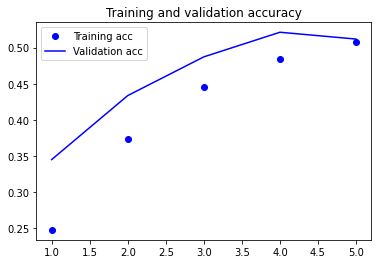

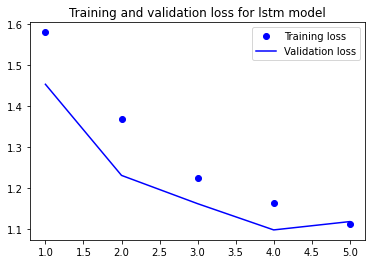

In [54]:
plot_history(history_lstm, epochs, "lstm model")

*   From above graphs, a nice trend we can observe which is loss is decreasing and accuracy is increasing for both training and validation.

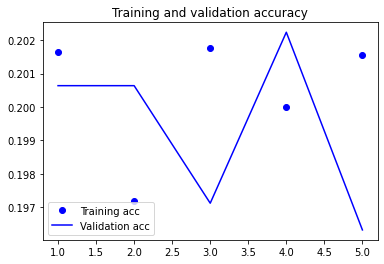

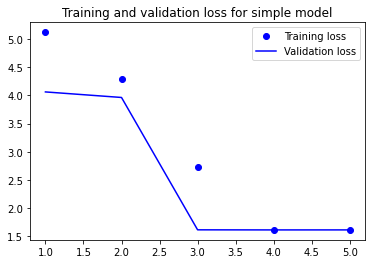

In [55]:
plot_history(history_rnn, epochs, "simple model")


*   Here, nothing can be said much as we have run it only for 5 epcohs and hence the results are not too great to make any conclusion.




##5: Model Prediciton And Evaluation

In [56]:
test_data = test_data[:no_of_records_to_use_for_TEST]

In [57]:
test_data

,rating,reviews
0,1,got new tire within two week golatook car toca...
1,1,not wast time two differ peopl come hous give ...
2,1,alan say bad peopl place lunch place freez loa...
3,1,restaur twice disappoint timesil not go back f...
4,1,food NOT GOOD husban ate heroupl week ago firs...
...,...,...
195,1,rotten food charg custom ni expect leaseason d...
196,2,must get patron could review tambellini restau...
197,1,not good initi told waitress go order appet de...
198,1,good thing eateri proxim benedum three us seat...


In [58]:
# Function for making the predicitons on test set
def predictions(data, model):
  labels = [1, 2, 3, 4, 5]  
  y_test = np.array([], dtype='i')
  y_pred = np.array([], dtype='i')
  reviews = data['reviews']
  rating = data['rating']

  for txt, gt_label in zip(reviews,rating):
    y_test = np.append(y_test, np.array([int(gt_label)]), 0)
    
    txt = [txt]
    seq = tokenizer.texts_to_sequences(txt)
    padded = pad_sequences(seq, maxlen=max_len)
    pred = model.predict(padded)

    # print(pred, labels[np.argmax(pred)])
    y_pred = np.append(y_pred, np.array([int(labels[np.argmax(pred)])]), 0)
  return y_test, y_pred

In [63]:
def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
           FP += 1
        if y_actual[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
           FN += 1

    return({"TP":TP, "FP":FP, "TN":TN, "FN":FN})

In [60]:
y_test, y_pred = predictions(test_data, model_lstm)

In [61]:
# y_test_sim, y_pred_sim = predictions(test_data, model_simple)
y_test_sim, y_pred_sim = predictions(test_data, model_rnn)

TPs and FPs for lstm model:  {'TP': 36, 'FP': 30, 'TN': 0, 'FN': 0}
TPs and FPs for RNN model:  {'TP': 0, 'FP': 0, 'TN': 0, 'FN': 0} 

------------------LSTM model metrics------------------
Precision Score of the model: 45.51557239057239
Recall Score of the model: 49.99638718451854
Acuracy score of the model: 48.0
F1 score of the model: 45.581190051778286 

------------------RNN model metrics------------------
Precision Score of the model: 4.673738347798135
Recall Score of the model: 18.46743295019157
Acuracy score of the model: 16.5
F1 score of the model: 6.714314075838793 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


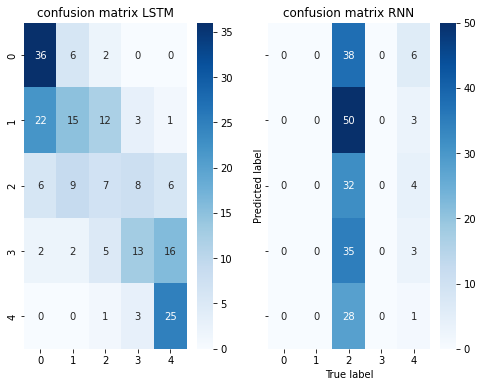

In [64]:
# Function for evaluating models
import random
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score, confusion_matrix, make_scorer
fig, ax =plt.subplots(1,2, sharex=True, sharey=True, figsize=(8,6))

cf_matrix_lstm = confusion_matrix(y_test,y_pred)
cf_matrix_simple = confusion_matrix(y_test_sim,y_pred_sim)

sns.heatmap(cf_matrix_lstm, annot = True, fmt = 'd',cmap="Blues", ax=ax[0])
sns.heatmap(cf_matrix_simple, annot = True, fmt = 'd',cmap="Blues", ax=ax[1])
ax[0].title.set_text('confusion matrix LSTM')
ax[1].title.set_text('confusion matrix RNN')
# plt.title('Heatmap of confusion matrix for Test data for lstm',)
plt.xlabel('True label')
plt.ylabel('Predicted label')

print("TPs and FPs for lstm model: ",perf_measure(y_test, y_pred))
print("TPs and FPs for RNN model: ",perf_measure(y_test_sim,y_pred_sim), "\n")

print("------------------LSTM model metrics------------------")
print("Precision Score of the model:", precision_score(y_test,y_pred, average='macro')*100)
print("Recall Score of the model:", recall_score(y_test,y_pred, average='macro')*100)
print("Acuracy score of the model:",accuracy_score(y_test,y_pred)*100)
print("F1 score of the model:",f1_score(y_test,y_pred, average='macro')*100, "\n")

print("------------------RNN model metrics------------------")
print("Precision Score of the model:", precision_score(y_test_sim,y_pred_sim, average='macro')*100)
print("Recall Score of the model:", recall_score(y_test_sim,y_pred_sim, average='macro')*100)
print("Acuracy score of the model:",accuracy_score(y_test_sim,y_pred_sim)*100)
print("F1 score of the model:",f1_score(y_test_sim,y_pred_sim, average='macro')*100, "\n")



*   From above results we can see that the diagonal of lstm represents better than simple one i.e. the **false positives** are lesser in number in 1st case whereas it's more in 2nd case, more specifically for third class (2) which has many false positives. For example in 2nd case, the bottom row for class 2 has been predicted as 4.
*   Similalry, the results of Precision and Recall tells more about Multi class classification where we just cant rely on accuracy. As we already know, maximizing precision will minimize the number false positives, whereas maximizing the recall will minimize the number of false negatives. However, these metrics are more useful when the dataset is imbalanced whereas in our case dataset was uniform. 



* Accuracy might look tempting but not a good metric in general. In multilabel classification, for each class we'll have f1 score, precision, recall values etc. We need to decide how to average them and the options are binary (which is the default one), micro, macro, weighted, samples. binary option needs positive and negative classes, and doesn't work in multilabel problems.
* To reiterate from sklearn documentation, micro option calculates TP, FP etc. globally, while macro does it specific to each class and averages them. weighted is the weighted version of macro average that accounts for class imbalance.